## Figure2: Total effect of entropy and surprisal

This notebook contains all code used to set up figure 2, which contains group-level results from an activation-based GLM analysis done in SPM. The chosen contrasts illustrate the total effect that either a decrease in entropy or an increase in surprise has on natural language processing.

Figure 2 is a [nilearn glass brain representation](https://nilearn.github.io/modules/generated/nilearn.plotting.plot_glass_brain.html). In order to display the two statistical maps on one glass brain, a little work is needed by adding the second one as an overlay. This necessitates another workaround, namely custom colorbars, which have to be created and thresholded.

In [154]:
from nilearn import plotting
from matplotlib import pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colorbar import ColorbarBase
import matplotlib.patches as mpatches
import numpy as np

In [155]:
import nibabel as nib

def find_threshold(imagepath):
    """
    This function takes a path to a Nifti image,
    loads it, and gives you the smallest value.
    Useful for identifying the threshold you used 
    as a T-value im thresholded SPMs
    """
    
    img = nib.load(imagepath) # load Nifti
    dat = np.array(img.get_fdata()) # load image into numpy array
    dat = dat[~np.isnan(dat)] # remove all nan
    return np.min(dat) # this is the threshold, in T-values

#print(find_threshold(surprisal_main))


In [156]:
def colormap_thresholding(cmap, threshold, boundaries, nb_ticks = 5):
    """takes in a cmap, threshold and boundaries
    returns a thresholded, bounded cmap, norm and bounds objects for plotting
    
    cmap: some colormap object
    threshold: some number
    boundaries: a tuple of length 2
    nb_ticks: number of ticks, default = 5
    
    requires matplotlib
    
    adapted from nilearn colormap hacking:
    https://github.com/nilearn/nilearn/blob/80572dbf2253bd7a5a00e688082cbd3075e71a12/nilearn/plotting/displays.py#L915
    """
    
    norm = Normalize(vmin=min(boundaries), vmax=max(boundaries))
    
    ticks = np.linspace(norm.vmin, norm.vmax, nb_ticks)
    bounds = np.linspace(norm.vmin, norm.vmax, cmap.N)
    
    cmaplist = [cmap(i) for i in range(cmap.N)]
    transparent_start = int(norm(-threshold, clip=True) * (cmap.N - 1))
    transparent_stop = int(norm(threshold, clip=True) * (cmap.N - 1))
    
    for i in range(transparent_start, transparent_stop):
        cmaplist[i] = (0.5, 0.5, 0.5) + (1,)  # transparent
        
    thresholded_cmap = LinearSegmentedColormap.from_list('Custom cmap', cmaplist, cmap.N)
    
    return thresholded_cmap, norm, ticks, bounds

def plot_thresholded_colormap():
    """
    TODO
    Make a function to automatically plot thresholded cmaps
    """
    pass

In [157]:
# load colormaps
red_cmap = plotting.cm.black_red_r
blue_cmap = plotting.cm.black_blue_r

# thresholding the colormaps
red_cmap_thres, red_norm, red_ticks, red_bounds = colormap_thresholding(red_cmap, 3.2, (0,5), nb_ticks = 5)
blue_cmap_thres, blue_norm, blue_ticks, blue_bounds = colormap_thresholding(blue_cmap, 3.2, (0,4.5), nb_ticks = 5)

"""#Test
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ColorbarBase(ax, ticks=red_ticks, norm=red_norm,
            orientation='horizontal', cmap=red_cmap_thres, boundaries=red_bounds,
            spacing='proportional', format='%.2g')
plt.show()
plt.clf()

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ColorbarBase(ax, ticks=blue_ticks, norm=blue_norm,
            orientation='horizontal', cmap=blue_cmap_thres, boundaries=blue_bounds,
            spacing='proportional', format='%.2g')"""

"#Test\nfig = plt.figure()\nax = fig.add_subplot(1,1,1)\n\nColorbarBase(ax, ticks=red_ticks, norm=red_norm,\n            orientation='horizontal', cmap=red_cmap_thres, boundaries=red_bounds,\n            spacing='proportional', format='%.2g')\nplt.show()\nplt.clf()\n\nfig = plt.figure()\nax = fig.add_subplot(1,1,1)\n\nColorbarBase(ax, ticks=blue_ticks, norm=blue_norm,\n            orientation='horizontal', cmap=blue_cmap_thres, boundaries=blue_bounds,\n            spacing='proportional', format='%.2g')"

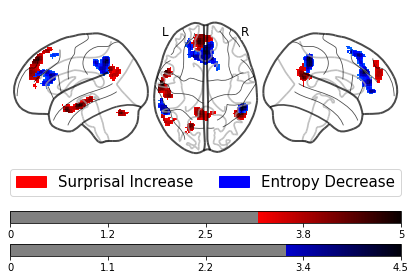

In [158]:
# setting up figure
fig = plt.figure(figsize = (7,9))

# gridspec tool
gs = fig.add_gridspec(4, 1, hspace = 0.28, wspace = 0.1, height_ratios = (2, 1, 1, 1))

# 3 axes
ax1 = fig.add_subplot(gs[0, :]) # glass brain
ax2 = fig.add_subplot(gs[1, :]) # surprisal colorbar
ax3 = fig.add_subplot(gs[2, :]) # entropy colorbar

# plotting glass brain with surprisal spm
display = plotting.plot_glass_brain(surprisal_main, display_mode = 'lzr', axes = ax1)#, colorbar = True, threshold = 3.2) 
# add overlay: entropy spm
display.add_overlay(entropy_main, cmap= plotting.cm.black_blue_r, vmin = 2)#, colorbar = True, threshold = 3.2)# vmin is really important to make the colors work properly

# plotting the colorbars
red_bar = ColorbarBase(
            ax2, ticks=red_ticks, norm=red_norm,
            orientation='horizontal', cmap=red_cmap_thres, boundaries=red_bounds,
            spacing='proportional', format='%.2g')

blue_bar = ColorbarBase(
            ax3, ticks=blue_ticks, norm=blue_norm,
            orientation='horizontal', cmap=blue_cmap_thres, boundaries=blue_bounds,
            spacing='proportional', format='%.2g')#, label = 't-statistics')

#blue_bar.set_label('t-statistics', fontsize = 15)

# configuring size and location of colorbars
ax2.set_aspect(0.03, anchor = (1,0.8))
ax3.set_aspect(0.03, anchor = (1,1.9))

# artist proxies for legend
red_patch = mpatches.Patch(color='red', label='Surprisal Increase')
blue_patch = mpatches.Patch(color='blue', label='Entropy Decrease')

# adding the legend
ax1.legend([red_patch, blue_patch],['Surprisal Increase', 'Entropy Decrease'], 
           loc='upper left', borderaxespad=0., ncol = 2, mode = 'expand', bbox_to_anchor = (0, 0, 1, 0), 
          fontsize = 15)

# save figure
plt.savefig("Figure2.png")

## Figure 2

Glass brain representation of activations associated with increase in suprisal (red) or decrease in next-word entropy (p = 0.001). Color indicates activation strength (T-values).